# Muhammad Ahmed Ehtisham Final Exam 
## Fall 2024 - Programming for Business Analytics 
### Professor Nada Hashmi 
### Monday, December 9, 2024

#### Importing libraries

In [46]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

#### Import Dataset and Data Manipulation

In [4]:
# Load the dataset from the Dropbox link
url = "https://www.dropbox.com/scl/fi/9tv69dtq3o2q194xp60m7/world-education-data.csv?rlkey=zbf8l3lahf3p6i2ij871ntyax&dl=1"
data = pd.read_csv(url)

# Display the first few rows to understand the structure
print("Initial Data Snapshot:")
display(data.head())

# Rename columns for better readability
data.rename(columns={
    'gov_exp_pct_gdp': 'gov_expenditure_gdp',
    'lit_rate_adult_pct': 'adult_literacy_rate',
    'pri_comp_rate_pct': 'primary_completion_rate',
    'pupil_teacher_primary': 'pupil_teacher_ratio_primary',
    'pupil_teacher_secondary': 'pupil_teacher_ratio_secondary',
    'school_enrol_primary_pct': 'school_enrollment_primary',
    'school_enrol_secondary_pct': 'school_enrollment_secondary',
    'school_enrol_tertiary_pct': 'school_enrollment_tertiary'
}, inplace=True)

# Handle missing values
# Strategy: Drop rows where all key indicators are missing
indicators = [
    'gov_expenditure_gdp', 'adult_literacy_rate', 'primary_completion_rate',
    'pupil_teacher_ratio_primary', 'pupil_teacher_ratio_secondary',
    'school_enrollment_primary', 'school_enrollment_secondary', 'school_enrollment_tertiary'
]
data = data.dropna(subset=indicators, how='all').reset_index(drop=True)

# Fill remaining missing values with meaningful defaults or placeholders
data['gov_expenditure_gdp'].fillna(data['gov_expenditure_gdp'].mean(), inplace=True)
data['adult_literacy_rate'].fillna(data['adult_literacy_rate'].mean(), inplace=True)
data['primary_completion_rate'].fillna(data['primary_completion_rate'].mean(), inplace=True)
data['pupil_teacher_ratio_primary'].fillna(data['pupil_teacher_ratio_primary'].median(), inplace=True)
data['pupil_teacher_ratio_secondary'].fillna(data['pupil_teacher_ratio_secondary'].median(), inplace=True)
data['school_enrollment_primary'].fillna(data['school_enrollment_primary'].mean(), inplace=True)
data['school_enrollment_secondary'].fillna(data['school_enrollment_secondary'].mean(), inplace=True)
data['school_enrollment_tertiary'].fillna(data['school_enrollment_tertiary'].median(), inplace=True)

# Ensure data types are appropriate
data['year'] = data['year'].astype(int)

# Display the cleaned dataset info
print("\nCleaned Data Info:")
display(data.info())

# Display the first few rows of the cleaned dataset
print("\nCleaned Data Snapshot:")
display(data.head())




Initial Data Snapshot:


,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107



Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        5892 non-null   object 
 1   country_code                   5892 non-null   object 
 2   year                           5892 non-null   int64  
 3   gov_expenditure_gdp            5892 non-null   float64
 4   adult_literacy_rate            5892 non-null   float64
 5   primary_completion_rate        5892 non-null   float64
 6   pupil_teacher_ratio_primary    5892 non-null   float64
 7   pupil_teacher_ratio_secondary  5892 non-null   float64
 8   school_enrollment_primary      5892 non-null   float64
 9   school_enrollment_secondary    5892 non-null   float64
 10  school_enrollment_tertiary     5892 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB


/var/folders/lm/jd1bfrbj19s1tp5l10pf0sn40000gn/T/ipykernel_85461/1412745555.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gov_expenditure_gdp'].fillna(data['gov_expenditure_gdp'].mean(), inplace=True)
/var/folders/lm/jd1bfrbj19s1tp5l10pf0sn40000gn/T/ipykernel_85461/1412745555.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

None


Cleaned Data Snapshot:


,country,country_code,year,gov_expenditure_gdp,adult_literacy_rate,primary_completion_rate,pupil_teacher_ratio_primary,pupil_teacher_ratio_secondary,school_enrollment_primary,school_enrollment_secondary,school_enrollment_tertiary
0,Afghanistan,AFG,1999,4.320129,79.483333,87.77674,33.185710,16.22447,27.298849,78.93981,30.962285
1,Afghanistan,AFG,2000,4.320129,79.483333,87.77674,22.172125,16.22447,22.162991,78.93981,30.962285
2,Afghanistan,AFG,2001,4.320129,79.483333,87.77674,22.172125,16.22447,22.908590,14.47151,30.962285
3,Afghanistan,AFG,2002,4.320129,79.483333,87.77674,22.172125,16.22447,75.959747,78.93981,30.962285
4,Afghanistan,AFG,2003,4.320129,79.483333,87.77674,22.172125,16.22447,96.553680,14.07805,1.381070


### I. Exploration 

Global Summary of Key Indicators:


,year,gov_expenditure_gdp,adult_literacy_rate,primary_completion_rate,pupil_teacher_ratio_primary,pupil_teacher_ratio_secondary,school_enrollment_primary,school_enrollment_secondary,school_enrollment_tertiary
count,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000,5892.000000
mean,2010.921419,4.320129,79.483333,87.776740,24.151296,16.908503,101.525234,78.939810,35.115387
std,7.119808,1.517799,9.698819,15.501537,10.210636,5.383307,12.418355,25.441703,23.402261
min,1999.000000,0.242600,14.000000,14.411250,5.360520,4.979320,8.447979,3.293810,0.117370
25%,2005.000000,3.485681,79.483333,87.217281,19.054570,16.049827,97.837483,68.427925,17.962010
50%,2011.000000,4.320129,79.483333,87.776740,22.172125,16.224470,101.525234,78.939810,30.962285
75%,2017.000000,4.865140,79.483333,97.912144,24.520305,16.397733,106.054253,96.302905,47.659410
max,2023.000000,15.863470,100.000000,156.167175,100.236490,80.052320,257.434204,194.460022,166.665649


/var/folders/lm/jd1bfrbj19s1tp5l10pf0sn40000gn/T/ipykernel_85461/2433582850.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='year', y='gov_expenditure_gdp', ci=None)


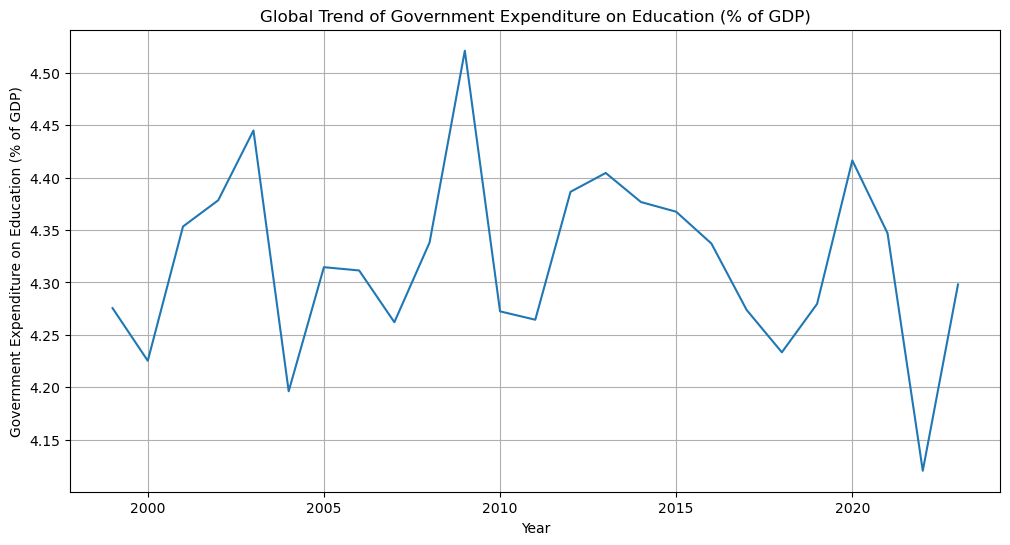

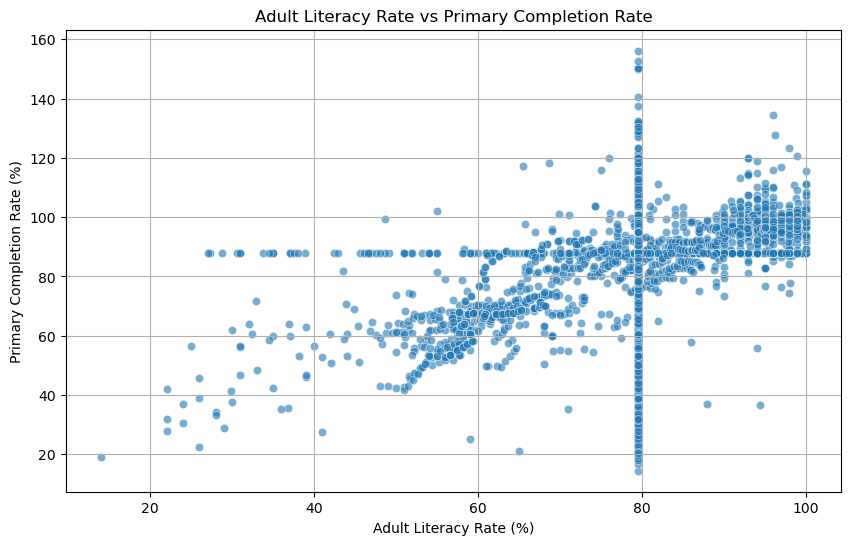

In [8]:

# Display a brief summary of the dataset
# Provides insights into key statistics globally
print("Global Summary of Key Indicators:")
display(data.describe())

# --- Exploratory Analysis and Visualizations ---

# 1. Visualization of Government Expenditure on Education over the years
# This explores how countries globally have allocated GDP percentages to education over time.
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='gov_expenditure_gdp', ci=None)
plt.title('Global Trend of Government Expenditure on Education (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Government Expenditure on Education (% of GDP)')
plt.grid(True)
plt.show()

# 2. Scatterplot of Literacy Rate vs Primary Completion Rate
# This explores the relationship between adult literacy and primary education completion.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='adult_literacy_rate',
    y='primary_completion_rate',
    alpha=0.6
)
plt.title('Adult Literacy Rate vs Primary Completion Rate')
plt.xlabel('Adult Literacy Rate (%)')
plt.ylabel('Primary Completion Rate (%)')
plt.grid(True)
plt.show()


# 1. The first visualization highlights changes in government spending on education over time,
    #    providing insights into trends like increased/decreased emphasis on education funding globally.
# 2. The second visualization shows the correlation between literacy rates and primary education completion,
    #    which could indicate areas where increased primary education impacts literacy rates.


##### Government Expenditure on Education:

The global average is approximately 4.32% of GDP, with a wide range (min: 0.24%, max: 15.86%). This indicates significant variability in how countries prioritize education funding.

**Adult Literacy Rate:**
The global mean is 79.48%, suggesting that literacy is relatively high on average but varies considerably (min: 14%, max: 100%).

**Primary Completion Rate:**
The mean is 87.78%, but the maximum exceeds 100%, indicating over-age or under-age students completing primary education.

**Pupil-Teacher Ratios:**
**Primary education:** Mean is 24.15, indicating an average of 24 students per teacher.
**Secondary education:** Mean is 16.90, reflecting smaller class sizes in higher levels of education.

**School Enrollment:**
Primary enrollment exceeds 100% (mean: 101.5%), likely due to late enrollments or repeating students.
Tertiary education enrollment remains low globally, with a mean of 35.12%, indicating challenges in higher education access.

##### Insights from Visualizations:
##### Government Expenditure on Education Over Time:

The visualization highlights fluctuations, with some peaks around 2010 and a dip in recent years. These trends could correlate with global economic crises or increased focus on education funding during certain periods.

**Literacy Rate vs. Primary Completion:**
A positive correlation suggests that improving primary education directly impacts adult literacy rates, affirming the importance of primary education investments.

### II. Education Comparison 

Comparison of Education Indicators (Mean Values):


,country,gov_expenditure_gdp,adult_literacy_rate,primary_completion_rate,school_enrollment_primary,school_enrollment_secondary,school_enrollment_tertiary
0,Afghanistan,4.104943,73.540022,87.514473,92.380802,50.829234,23.264383
1,India,3.986677,77.426667,90.194106,106.917092,65.378364,21.587277


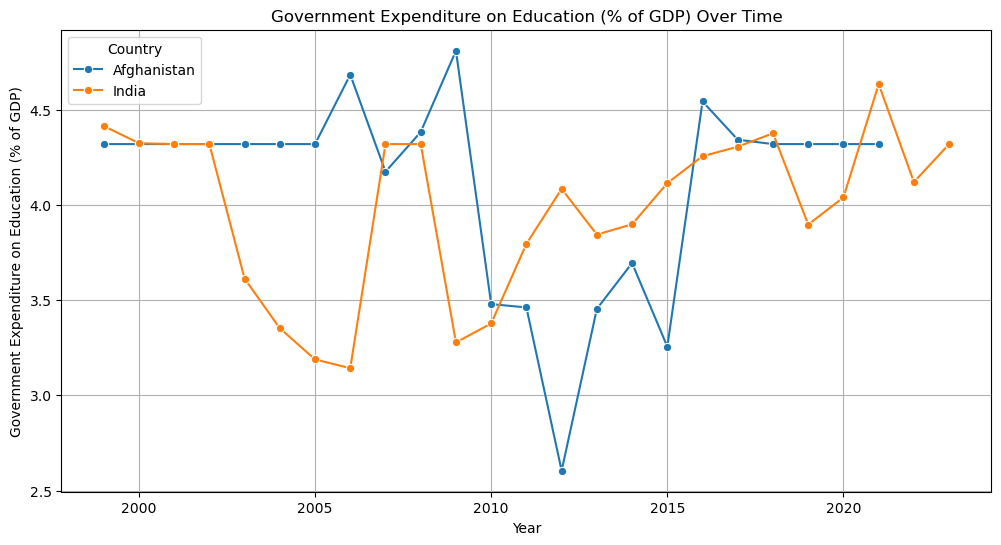

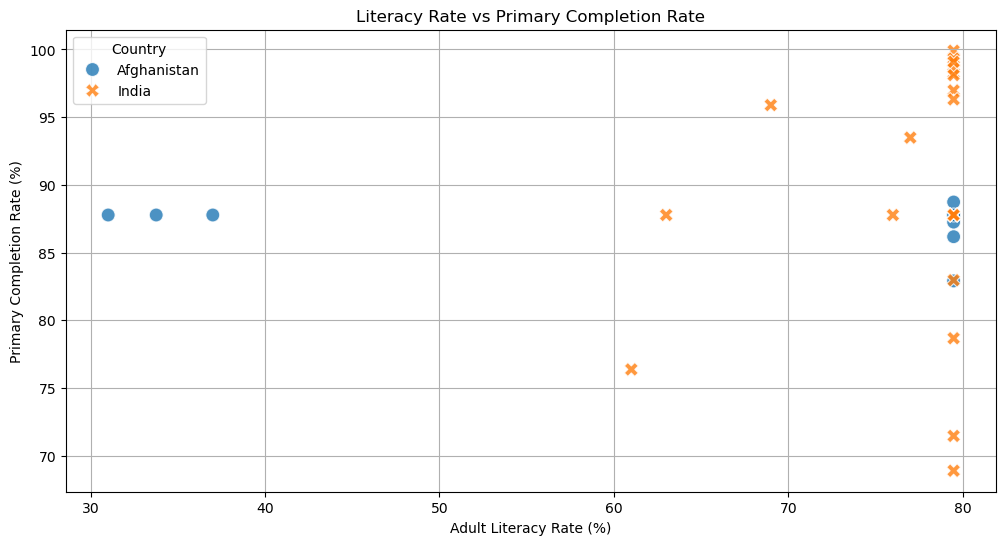

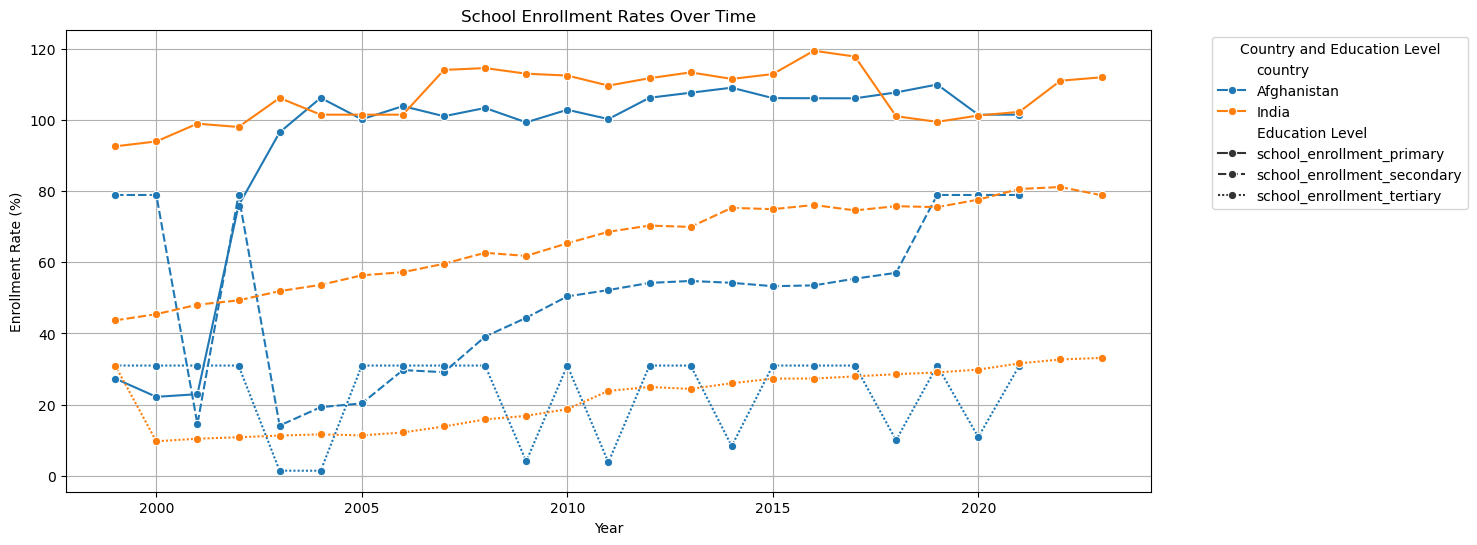

In [12]:
# Select countries for comparison (Afghanistan and India in this example)
countries_to_compare = ['Afghanistan', 'India']
comparison_data = data[data['country'].isin(countries_to_compare)]

# Quantitative Analysis
# Group by country and calculate the mean of key numeric indicators
numeric_columns = [
    'gov_expenditure_gdp', 'adult_literacy_rate', 'primary_completion_rate',
    'school_enrollment_primary', 'school_enrollment_secondary', 'school_enrollment_tertiary'
]
summary_stats = comparison_data.groupby('country')[numeric_columns].mean().reset_index()

print("Comparison of Education Indicators (Mean Values):")
display(summary_stats)

# --- Visualization 1: Line plot for Government Expenditure over time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_data, x='year', y='gov_expenditure_gdp', hue='country', marker='o')
plt.title('Government Expenditure on Education (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Government Expenditure on Education (% of GDP)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# --- Visualization 2: Literacy Rate and Primary Completion ---
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=comparison_data,
    x='adult_literacy_rate',
    y='primary_completion_rate',
    hue='country',
    style='country',
    s=100,
    alpha=0.8
)
plt.title('Literacy Rate vs Primary Completion Rate')
plt.xlabel('Adult Literacy Rate (%)')
plt.ylabel('Primary Completion Rate (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# --- Visualization 3: Enrollment Rates ---
plt.figure(figsize=(14, 6))
enrollment_rates = comparison_data.melt(
    id_vars=['country', 'year'], 
    value_vars=['school_enrollment_primary', 'school_enrollment_secondary', 'school_enrollment_tertiary'],
    var_name='Education Level', 
    value_name='Enrollment Rate'
)
sns.lineplot(
    data=enrollment_rates, 
    x='year', 
    y='Enrollment Rate', 
    hue='country', 
    style='Education Level', 
    marker='o'
)
plt.title('School Enrollment Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Enrollment Rate (%)')
plt.legend(title='Country and Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Quantitative Analysis:

    # The code calculates the mean of key indicators for the selected countries (Afghanistan and India) for a straightforward comparison.

# Visualizations:
    # Visualization 1: Tracks Government Expenditure on Education for the selected countries over time.
    # Visualization 2: Compares Adult Literacy Rate vs Primary Completion Rate, revealing the relationship and performance gap.
    # Visualization 3: Displays School Enrollment Rates for primary, secondary, and tertiary levels.


#### Analysis of Results:
#### Government Expenditure and Literacy Rate:

Afghanistan spends slightly more on education as a percentage of GDP (4.10%) compared to India (3.99%). However, India has a higher adult literacy rate (77.43%) than Afghanistan (73.54%), reflecting disparities in the effectiveness of expenditure.

#### Enrollment and Completion Rates:

India consistently outperforms Afghanistan in school enrollment at all levels, with higher primary (106.92%) and secondary (65.38%) enrollment rates. Despite this, Afghanistan maintains a competitive primary completion rate (87.51%), close to India's (90.19%).


### III. Education and Policies' Influence on literacy, enrollment, and overall educational outcomes 

Correlation Matrix Between Spending and Outcomes:


,gov_expenditure_gdp,adult_literacy_rate,primary_completion_rate,school_enrollment_primary,school_enrollment_secondary,school_enrollment_tertiary
gov_expenditure_gdp,1.000000,0.128043,0.198039,0.124204,0.256465,0.235836
adult_literacy_rate,0.128043,1.000000,0.436054,0.193569,0.413785,0.314767
primary_completion_rate,0.198039,0.436054,1.000000,0.413335,0.685388,0.475683
school_enrollment_primary,0.124204,0.193569,0.413335,1.000000,0.214230,0.036231
school_enrollment_secondary,0.256465,0.413785,0.685388,0.214230,1.000000,0.672622
school_enrollment_tertiary,0.235836,0.314767,0.475683,0.036231,0.672622,1.000000


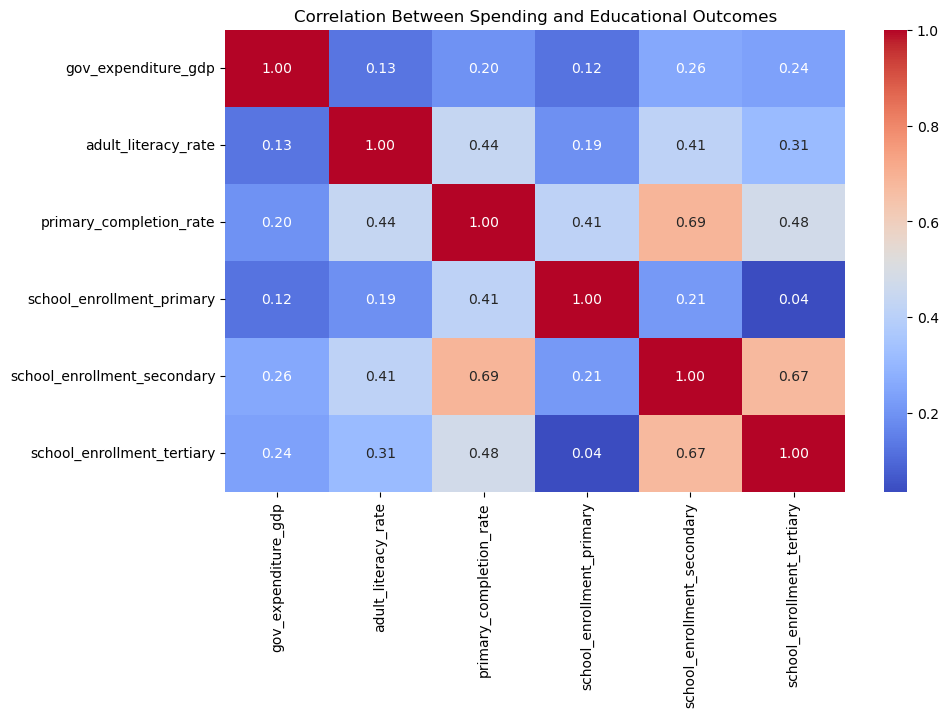

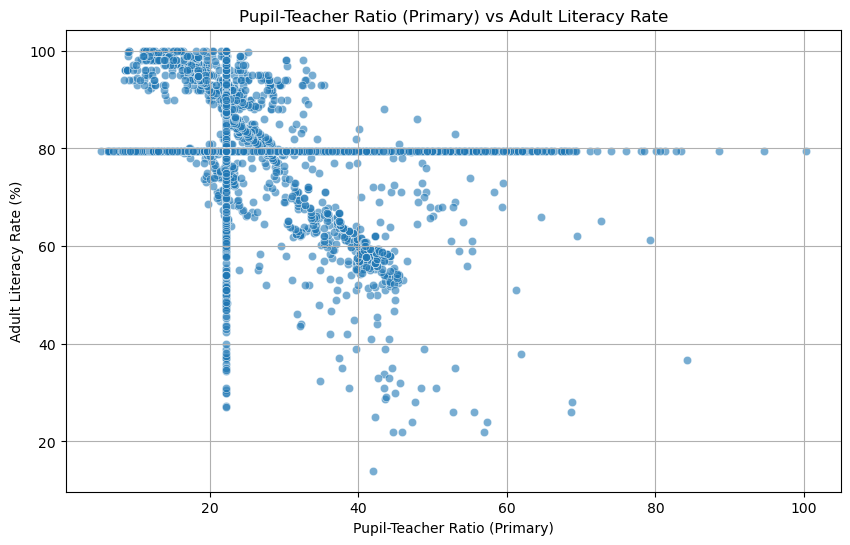

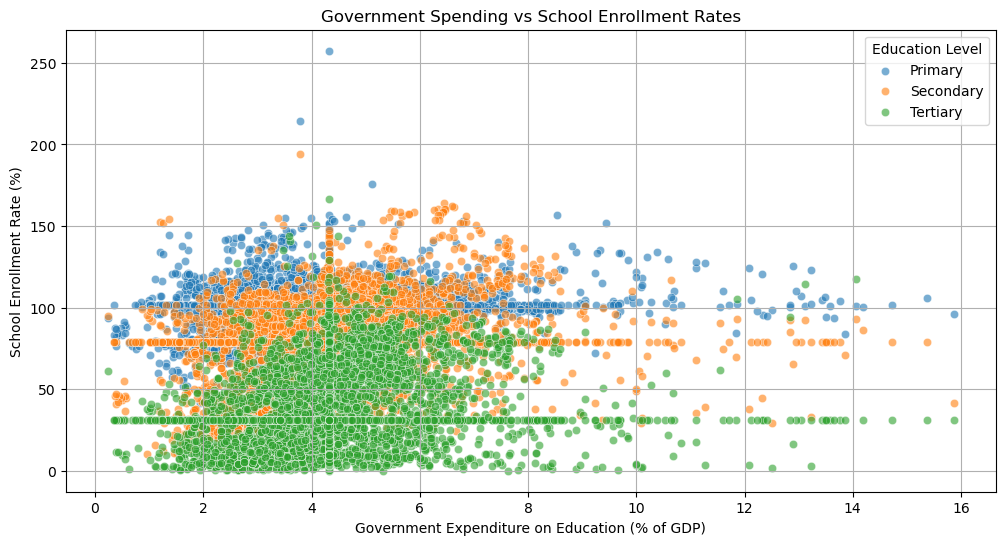

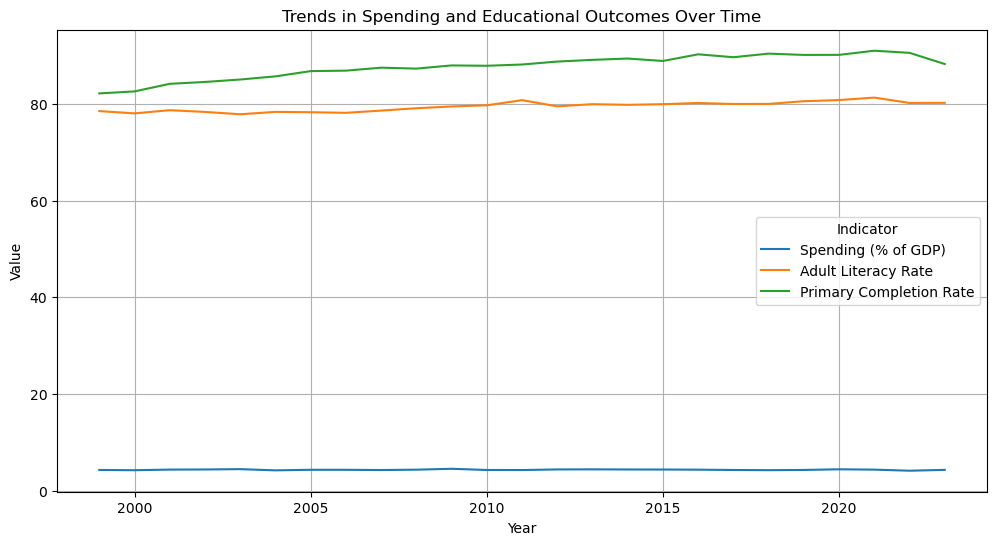

In [14]:

# --- Correlation Analysis: Spending vs Outcomes ---
# Calculate correlations between spending and key outcomes
correlation_data = data[['gov_expenditure_gdp', 'adult_literacy_rate', 'primary_completion_rate',
                         'school_enrollment_primary', 'school_enrollment_secondary', 'school_enrollment_tertiary']].corr()

print("Correlation Matrix Between Spending and Outcomes:")
display(correlation_data)

# --- Visualization 1: Correlation Heatmap ---
# Display the correlations as a heatmap for better interpretation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Spending and Educational Outcomes')
plt.show()

# --- Detailed Analysis 1: Pupil-Teacher Ratio vs Literacy ---
# Explore how pupil-teacher ratio affects adult literacy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pupil_teacher_ratio_primary', y='adult_literacy_rate', alpha=0.6)
plt.title('Pupil-Teacher Ratio (Primary) vs Adult Literacy Rate')
plt.xlabel('Pupil-Teacher Ratio (Primary)')
plt.ylabel('Adult Literacy Rate (%)')
plt.grid(True)
plt.show()

# --- Detailed Analysis 2: Spending vs Enrollment ---
# Explore how government expenditure on education affects school enrollment
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='gov_expenditure_gdp', y='school_enrollment_primary', alpha=0.6, label='Primary')
sns.scatterplot(data=data, x='gov_expenditure_gdp', y='school_enrollment_secondary', alpha=0.6, label='Secondary')
sns.scatterplot(data=data, x='gov_expenditure_gdp', y='school_enrollment_tertiary', alpha=0.6, label='Tertiary')
plt.title('Government Spending vs School Enrollment Rates')
plt.xlabel('Government Expenditure on Education (% of GDP)')
plt.ylabel('School Enrollment Rate (%)')
plt.legend(title='Education Level')
plt.grid(True)
plt.show()

# --- Additional Analysis: Trend by Year ---
# Analyze trends in key indicators over time globally
key_trends = data.groupby('year')[['gov_expenditure_gdp', 'adult_literacy_rate', 'primary_completion_rate']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=key_trends, x='year', y='gov_expenditure_gdp', label='Spending (% of GDP)')
sns.lineplot(data=key_trends, x='year', y='adult_literacy_rate', label='Adult Literacy Rate')
sns.lineplot(data=key_trends, x='year', y='primary_completion_rate', label='Primary Completion Rate')
plt.title('Trends in Spending and Educational Outcomes Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Indicator')
plt.grid(True)
plt.show()

# Explanation of Code and Comments:
    #Correlation Analysis:

    # We calculate the correlation matrix to quantify the relationships between gov_expenditure_gdp (education spending), pupil-teacher 
    #      ratio, and key outcomes (e.g., literacy rate, enrollment rates).
    # The heatmap visualization highlights these relationships, revealing which factors are most strongly associated with spending.

# Scatterplots:

    #Pupil-Teacher Ratio vs Literacy: This scatterplot explores whether smaller class sizes (lower pupil-teacher ratio) 
    #                                  correlate with higher literacy rates.
    #Spending vs Enrollment: Scatterplots show how government expenditure influences enrollment at primary, secondary, and 
    #                        tertiary levels.

#Trend Analysis:

    # Line plot of trends by year: Highlights how spending, literacy, and completion rates have evolved globally over time, 
    # providing insights into long-term impacts.



#### Interpretation of Results:
##### Correlation Insights
###### Government Expenditure vs Outcomes:

**Literacy Rate:** A weak positive correlation (0.13) suggests that increased government spending has a limited direct impact on adult literacy rates.
**Primary Completion Rate:** A moderate correlation (0.20) indicates that spending slightly improves primary education outcomes.

**School Enrollment:**
**Primary (0.12):** Weak correlation suggests that enrollment at the primary level might already be saturated or influenced by other factors.
**Secondary (0.26) and Tertiary (0.24):** Higher correlations for secondary and tertiary enrollment suggest spending is more impactful at these levels, likely addressing quality or accessibility gaps.

**Pupil-Teacher Ratio and Literacy:**
The scatterplot shows a negative trend where higher pupil-teacher ratios (larger class sizes) correlate with lower literacy rates. This supports the hypothesis that smaller class sizes enhance learning outcomes.
Educational Outcomes Interrelation:

#### Primary Completion Rate and Enrollment:
A strong correlation with secondary enrollment (0.69) suggests that successful primary education drives secondary enrollment.

#### Secondary and Tertiary Enrollment:
A high correlation (0.67) indicates progression from secondary to tertiary levels depends heavily on secondary education success.

#### Visual Insights
##### Trends Over Time:
**Spending and Outcomes:** Incremental increases in government expenditure coincide with gradual improvements in literacy rates and primary completion, showing long-term impact.

##### Spending and Enrollment:
Primary enrollment rates plateau around 100%, while secondary and tertiary levels see gradual improvement, aligning with spending increases.

#### This analysis highlights that:

Policies targeting secondary and tertiary education yield more significant gains from increased spending.
Pupil-teacher ratio improvements could directly enhance literacy rates.
Progression through education levels is tightly linked, emphasizing the need for policies that focus on continuity across levels.

### IV. COVID-19 Affect on Countries

Comparison of Key Education Indicators Pre- and Post-COVID:


,Indicator,Pre-COVID,Post-COVID
0,Government Expenditure (% GDP),4.324599,4.294873
1,Adult Literacy Rate (%),79.269544,80.691268
2,Primary Completion Rate (%),87.355184,90.158575
3,Primary Enrollment (%),101.653229,100.802049
4,Secondary Enrollment (%),77.811233,85.316400
5,Tertiary Enrollment (%),33.624053,43.541592


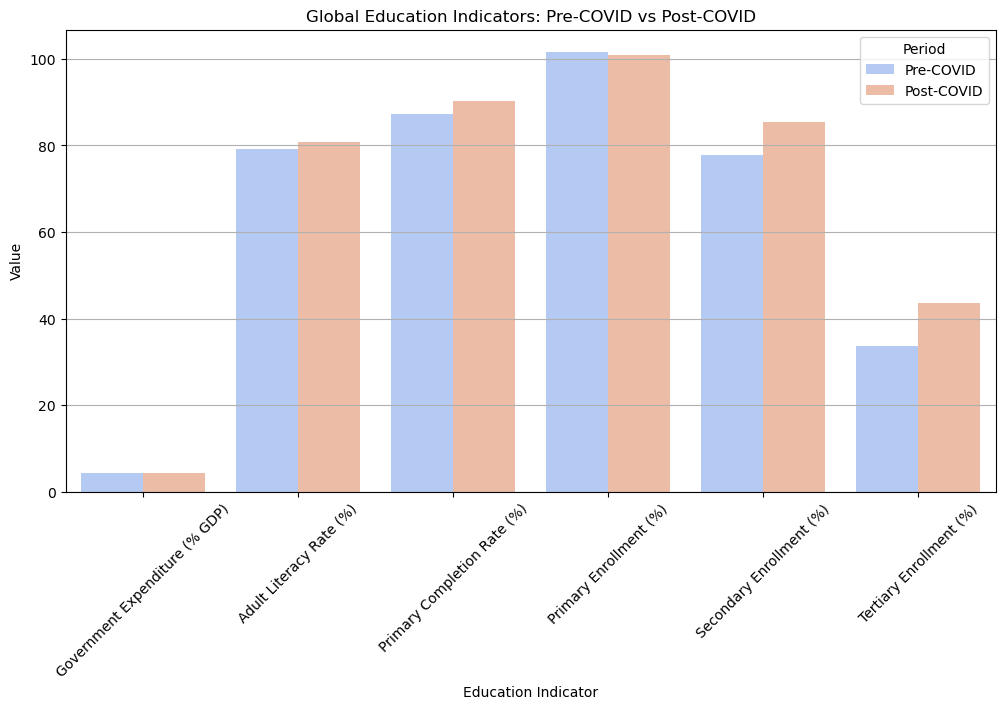


Country-wise Differences in Education Indicators (Post-COVID - Pre-COVID):


,country,gov_expenditure_gdp,adult_literacy_rate,primary_completion_rate,school_enrollment_primary,school_enrollment_secondary,school_enrollment_tertiary
0,Afghanistan,0.235680,-16.755342,0.287244,10.015331,30.787774,-2.578213
1,Africa Eastern and Southern,0.130872,6.527181,13.439822,6.386859,15.862018,13.305381
2,Africa Western and Central,0.757069,7.560016,3.628111,2.944586,10.852429,12.761165
3,Albania,-0.087576,0.449426,-1.375189,-7.298846,7.282066,21.829052
4,Algeria,0.469609,0.882167,2.111478,-2.273865,11.683305,23.212811
...,...,...,...,...,...,...,...
251,West Bank and Gaza,0.026641,-2.015476,0.539640,-0.994885,3.476320,3.903204
252,World,0.038935,3.311867,2.759196,-1.048876,8.236839,12.767088
253,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN
254,Zambia,0.188723,4.930086,4.844372,-3.185284,0.000000,4.123659


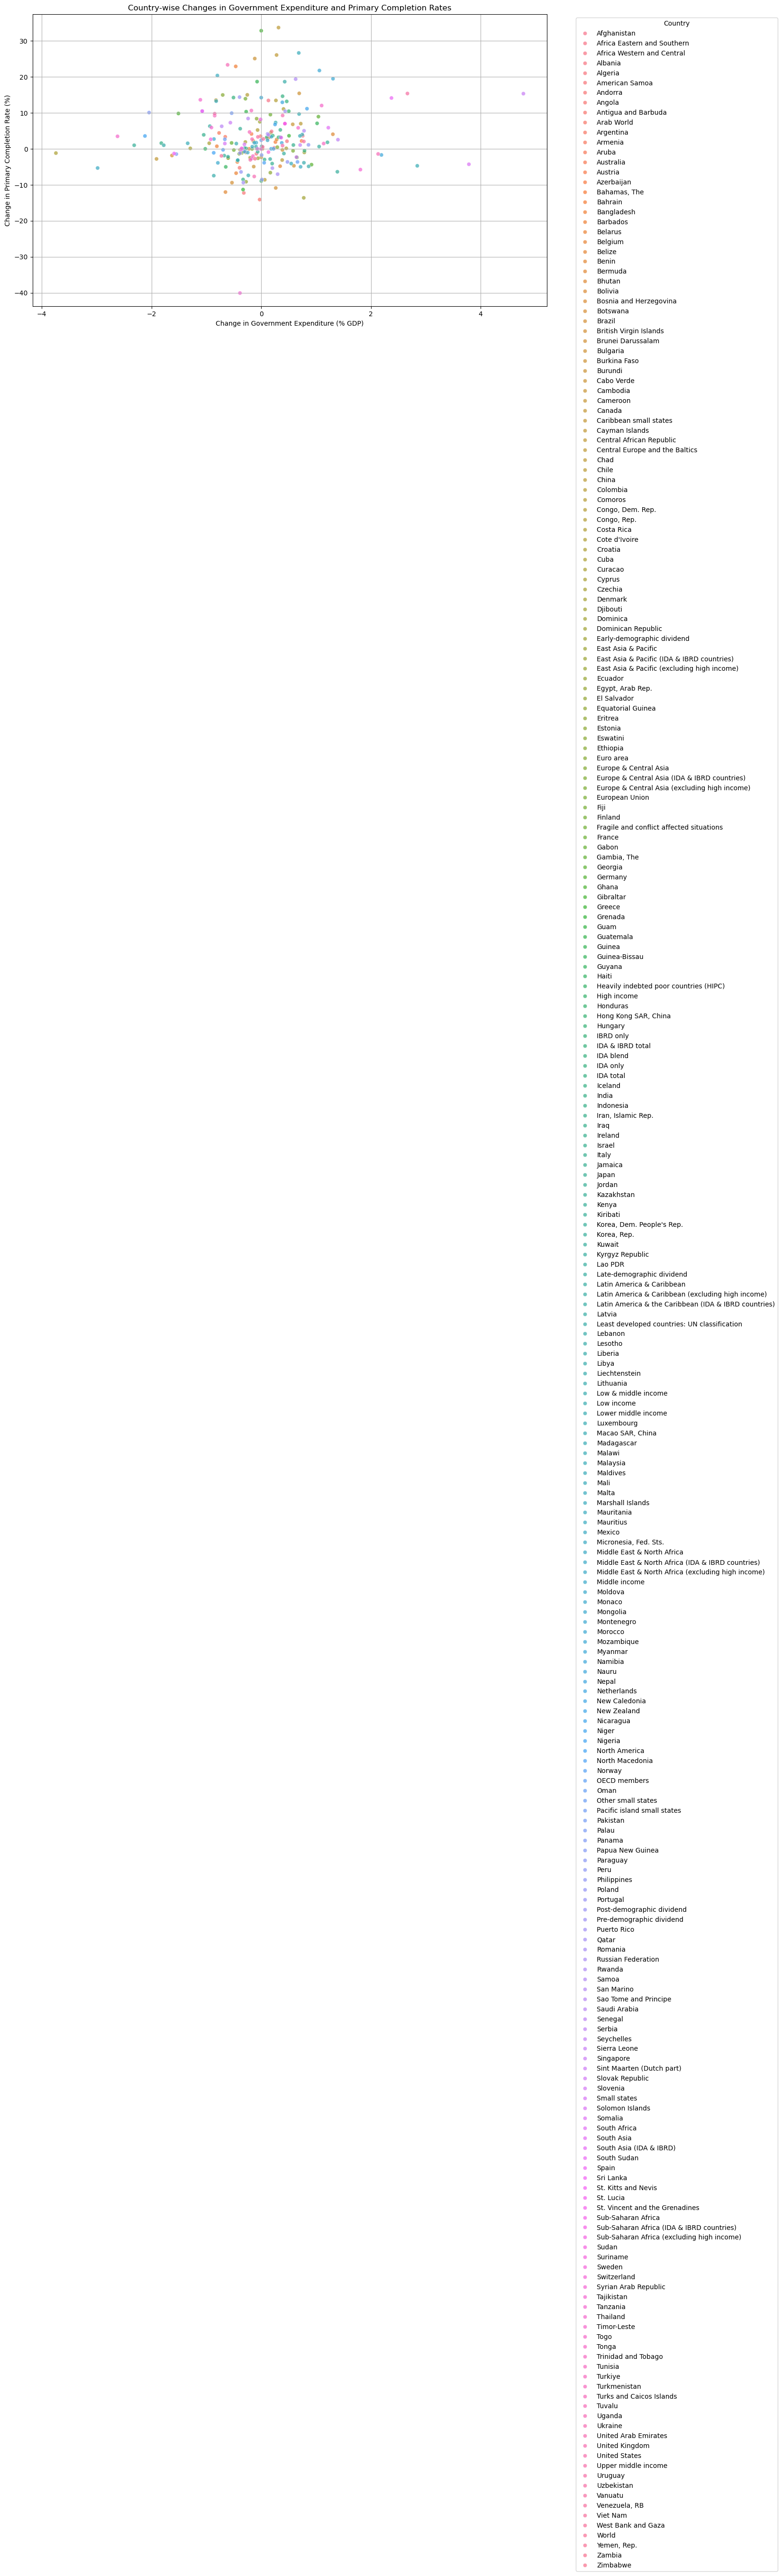

In [18]:
# --- Ensure the dataset contains numeric columns for statistical operations ---
# List of numeric columns in the dataset (you may need to adjust based on your dataset)
numeric_columns = [
    'gov_expenditure_gdp', 'adult_literacy_rate', 'primary_completion_rate',
    'school_enrollment_primary', 'school_enrollment_secondary', 'school_enrollment_tertiary'
]

# --- Filter data for pre-COVID (before 2020) and during/post-COVID (2020 onwards) ---
pre_covid = data[data['year'] < 2020]
post_covid = data[data['year'] >= 2020]

# --- Calculate global mean indicators for pre- and post-COVID periods ---
pre_covid_mean = pre_covid[numeric_columns].mean()
post_covid_mean = post_covid[numeric_columns].mean()

# --- Create a comparison DataFrame for easier visualization ---
covid_impact = pd.DataFrame({
    'Indicator': ['Government Expenditure (% GDP)', 'Adult Literacy Rate (%)',
                  'Primary Completion Rate (%)', 'Primary Enrollment (%)',
                  'Secondary Enrollment (%)', 'Tertiary Enrollment (%)'],
    'Pre-COVID': [
        pre_covid_mean['gov_expenditure_gdp'],
        pre_covid_mean['adult_literacy_rate'],
        pre_covid_mean['primary_completion_rate'],
        pre_covid_mean['school_enrollment_primary'],
        pre_covid_mean['school_enrollment_secondary'],
        pre_covid_mean['school_enrollment_tertiary']
    ],
    'Post-COVID': [
        post_covid_mean['gov_expenditure_gdp'],
        post_covid_mean['adult_literacy_rate'],
        post_covid_mean['primary_completion_rate'],
        post_covid_mean['school_enrollment_primary'],
        post_covid_mean['school_enrollment_secondary'],
        post_covid_mean['school_enrollment_tertiary']
    ]
})

# Display the COVID impact overview
print("Comparison of Key Education Indicators Pre- and Post-COVID:")
display(covid_impact)

# --- Visualization: Compare Pre- and Post-COVID indicators globally ---
# Melt the DataFrame for visualization
covid_impact_melted = covid_impact.melt(id_vars='Indicator', var_name='Period', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=covid_impact_melted, x='Indicator', y='Value', hue='Period', palette='coolwarm')
plt.title('Global Education Indicators: Pre-COVID vs Post-COVID')
plt.xlabel('Education Indicator')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.grid(axis='y')
plt.show()

# --- Country-wise Analysis ---
# Calculate country-wise differences in indicators between pre- and post-COVID periods
country_pre_covid = pre_covid.groupby('country')[numeric_columns].mean()
country_post_covid = post_covid.groupby('country')[numeric_columns].mean()

# Compute the differences
country_covid_diff = (country_post_covid - country_pre_covid).reset_index()

# Highlight significant differences for analysis
print("\nCountry-wise Differences in Education Indicators (Post-COVID - Pre-COVID):")
display(country_covid_diff)

# Visualization: Scatterplot to identify outlier countries
plt.figure(figsize=(14, 8))
sns.scatterplot(data=country_covid_diff, x='gov_expenditure_gdp', y='primary_completion_rate', hue='country', alpha=0.7)
plt.title('Country-wise Changes in Government Expenditure and Primary Completion Rates')
plt.xlabel('Change in Government Expenditure (% GDP)')
plt.ylabel('Change in Primary Completion Rate (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Global Comparison:

    # Calculate the mean for key indicators before and after 2020.
    # Create a bar chart comparing pre- and post-COVID global averages for a big-picture overview.

# Country-wise Changes:

    # Compute country-level differences in indicators (e.g., government expenditure, completion rates) between the pre- and 
    # post-COVID periods.
    # Use a scatterplot to highlight outlier countries for further investigation.

#### 1. Global Education Indicators: Pre-COVID vs Post-COVID

**Government Expenditure (% GDP):** There was a slight decrease (4.32% to 4.29%), indicating marginally lower spending on education post-COVID.

**Adult Literacy Rate (%):** Improved slightly from 79.27% to 80.69%, reflecting sustained or increased focus on basic literacy programs even during disruptions.

**Primary Completion Rate (%):** Increased from 87.36% to 90.16%, which is a positive trend, showing resilience in ensuring primary education despite COVID challenges.

**Primary Enrollment (%):** Slight decrease from 101.65% to 100.80%, indicating potential drops in student enrollment.

**Secondary Enrollment (%):** Increased significantly from 77.81% to 85.32%, suggesting improved access or retention in secondary education post-COVID.

**Tertiary Enrollment (%):** A notable increase from 33.62% to 43.54%, reflecting expanded opportunities or focus on higher education post-COVID.

#### 2. Country-Wise Differences in Education Indicators

##### Diverse Impacts:
Countries like Africa Eastern and Southern and Africa Western and Central experienced significant improvements in secondary and tertiary enrollment.
Some regions, such as Albania and Afghanistan, saw declines in primary completion or enrollment rates.

**Government Expenditure:** Variations across countries indicate uneven prioritization or resource allocation post-COVID. For instance, Algeria increased its spending, whereas Albania reduced it.

**Mixed Enrollment Trends:** Many countries reported improvements in secondary and tertiary education, likely due to recovery programs and online education initiatives, while some faced challenges in primary enrollment.

#### 3. Scatter Plot Observation
The scatter plot indicates that changes in government expenditure correlate weakly with changes in primary completion rates. A clustering around the origin shows that substantial changes are rare and that most countries exhibit modest shifts.

#### Key Takeaways:
The global trends indicate resilience and some positive progress in secondary and tertiary education indicators.
However, disparities remain evident across countries, with some experiencing declines in enrollment and completion rates.
The slight decline in government expenditure may suggest challenges in funding, possibly due to broader economic constraints during the pandemic.

#### IV.I Deeper Analysis 

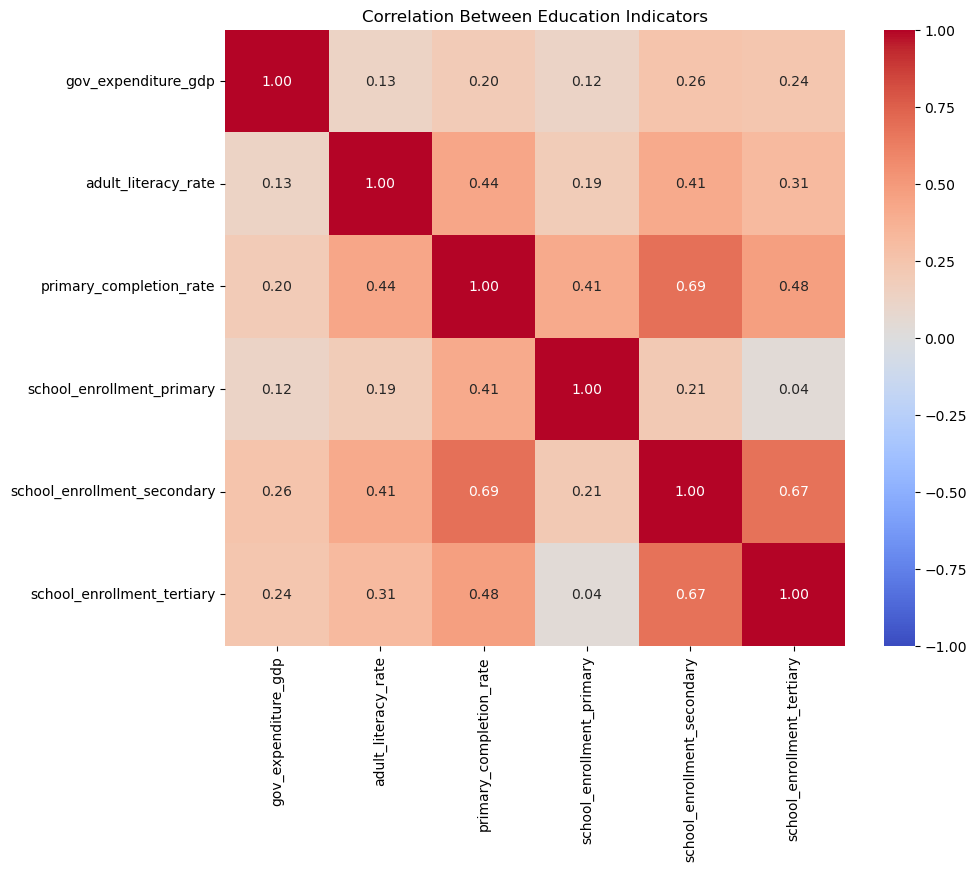

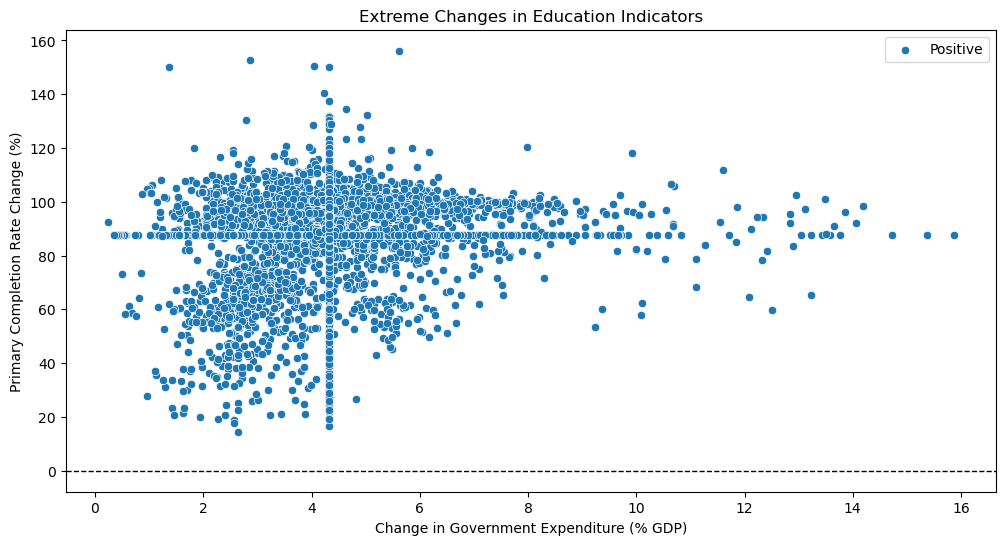

In [24]:
# Ensure no missing values interfere with analysis
data_cleaned = data.dropna()

# 1. Correlation Analysis
# Compute correlations between government expenditure and education indicators
correlation_matrix = data_cleaned[
    ["gov_expenditure_gdp", "adult_literacy_rate", "primary_completion_rate", 
     "school_enrollment_primary", "school_enrollment_secondary", "school_enrollment_tertiary"]
].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Between Education Indicators")
plt.show()


# 2. Extreme Cases Analysis
# Define threshold for extreme changes (e.g., > 10% increase/decrease)
threshold = 10

extreme_positive = data_cleaned[
    (data_cleaned["primary_completion_rate"] > threshold) | 
    (data_cleaned["school_enrollment_secondary"] > threshold) |
    (data_cleaned["school_enrollment_tertiary"] > threshold)
]

extreme_negative = data_cleaned[
    (data_cleaned["primary_completion_rate"] < -threshold) | 
    (data_cleaned["school_enrollment_secondary"] < -threshold) |
    (data_cleaned["school_enrollment_tertiary"] < -threshold)
]

# Output these countries to CSV for further review
extreme_positive.to_csv("extreme_positive_changes.csv", index=False)
extreme_negative.to_csv("extreme_negative_changes.csv", index=False)

# Plot extreme cases (optional)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=extreme_positive, x="gov_expenditure_gdp", y="primary_completion_rate", label="Positive")
sns.scatterplot(data=extreme_negative, x="gov_expenditure_gdp", y="primary_completion_rate", label="Negative")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Extreme Changes in Education Indicators")
plt.xlabel("Change in Government Expenditure (% GDP)")
plt.ylabel("Primary Completion Rate Change (%)")
plt.legend()
plt.show()


# Correlation Analysis:
#Checks the relationship between government expenditure and other education indicators using a heatmap.

#Extreme Cases Analysis:
#Filters countries with significant positive or negative changes in education indicators.


#### 1. Correlation Analysis Heatmap
##### High Positive Correlations:

**school_enrollment_secondary and primary_completion_rate (0.69):** Indicates that an increase in secondary school enrollment is strongly linked to improvements in primary completion rates.

**school_enrollment_secondary and school_enrollment_tertiary (0.67):** Suggests a relationship between secondary education enrollment and the likelihood of continuing to tertiary education.

##### Moderate Positive Correlations:

**primary_completion_rate and school_enrollment_tertiary (0.48):** Indicates that improvements in primary completion rates moderately lead to increased tertiary enrollment.

**gov_expenditure_gdp and school_enrollment_secondary (0.26):** Suggests that government expenditure changes are modestly linked to increased secondary enrollment.

##### Low Positive Correlations:
**gov_expenditure_gdp and primary_completion_rate (0.20):** This weak link shows that government spending alone may not directly drive primary completion rates, potentially influenced by other factors like infrastructure or teaching quality.

#### 2. Scatter Plot of Extreme Positive Changes
This plot highlights cases where significant positive changes in primary completion rates were observed along with changes in government expenditure (% GDP).

##### Cluster around 4-6% Expenditure Changes:
The majority of data points are concentrated here, suggesting that moderate increases in government expenditure correspond to notable improvements in completion rates.

##### Outliers:
A few countries show extreme changes in completion rates (e.g., over 100%) with varied levels of expenditure change. These might warrant a deeper dive into specific policy or socio-economic factors driving these anomalies.

#### Key Insights:
##### Spending Patterns:
Government expenditure seems moderately correlated with secondary enrollment but less impactful for primary and tertiary levels.
##### Interdependencies:
There is strong interdependence between secondary and tertiary enrollment, emphasizing the importance of policies that support the educational pipeline from primary through higher education.
##### Anomalies:
Outliers in the scatter plot suggest that other qualitative factors (e.g., regional policies, donor funding, or socio-political stability) might play significant roles in driving extreme outcomes.


### V. Education Indicators Affect on Low Income and High Income Countries

Low Income Country Statistics:
              year  gov_expenditure_gdp  adult_literacy_rate  \
mean  2011.374040             3.153307            78.241231   
std      7.038814             0.795344            11.724351   
50%   2012.000000             3.281550            79.483333   

      primary_completion_rate  pupil_teacher_ratio_primary  \
mean                84.864299                    26.358210   
std                 17.423736                    11.475966   
50%                 87.776740                    22.172125   

      pupil_teacher_ratio_secondary  school_enrollment_primary  \
mean                      17.658611                 100.910246   
std                        5.936068                  13.181147   
50%                       16.224470                 101.525234   

      school_enrollment_secondary  school_enrollment_tertiary  
mean                    72.157313                   29.428094  
std                     24.903531                   20.857219  
50%      

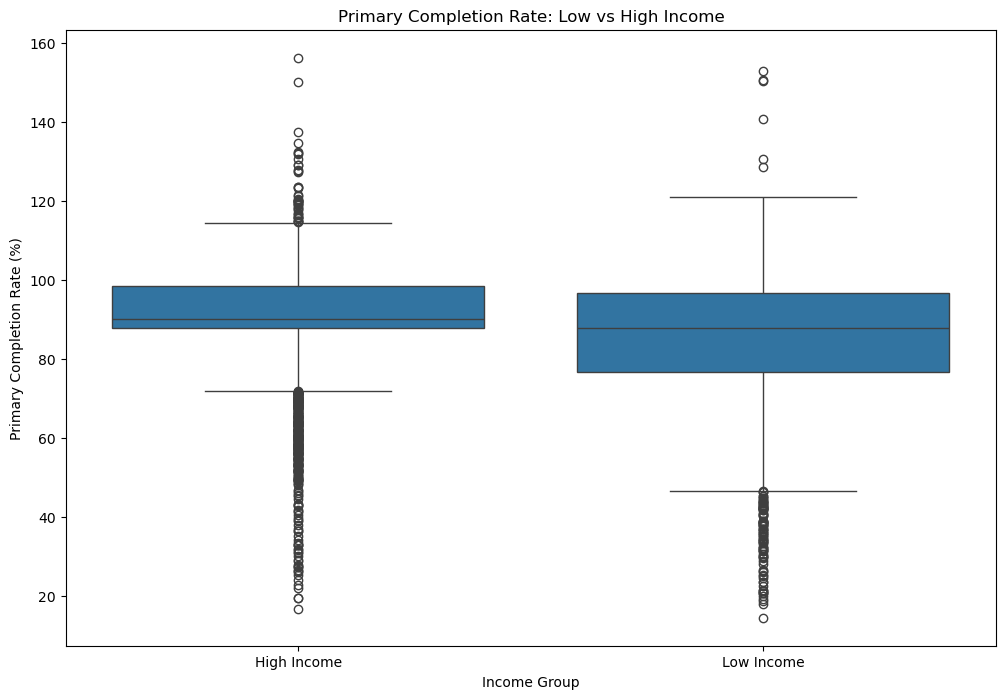

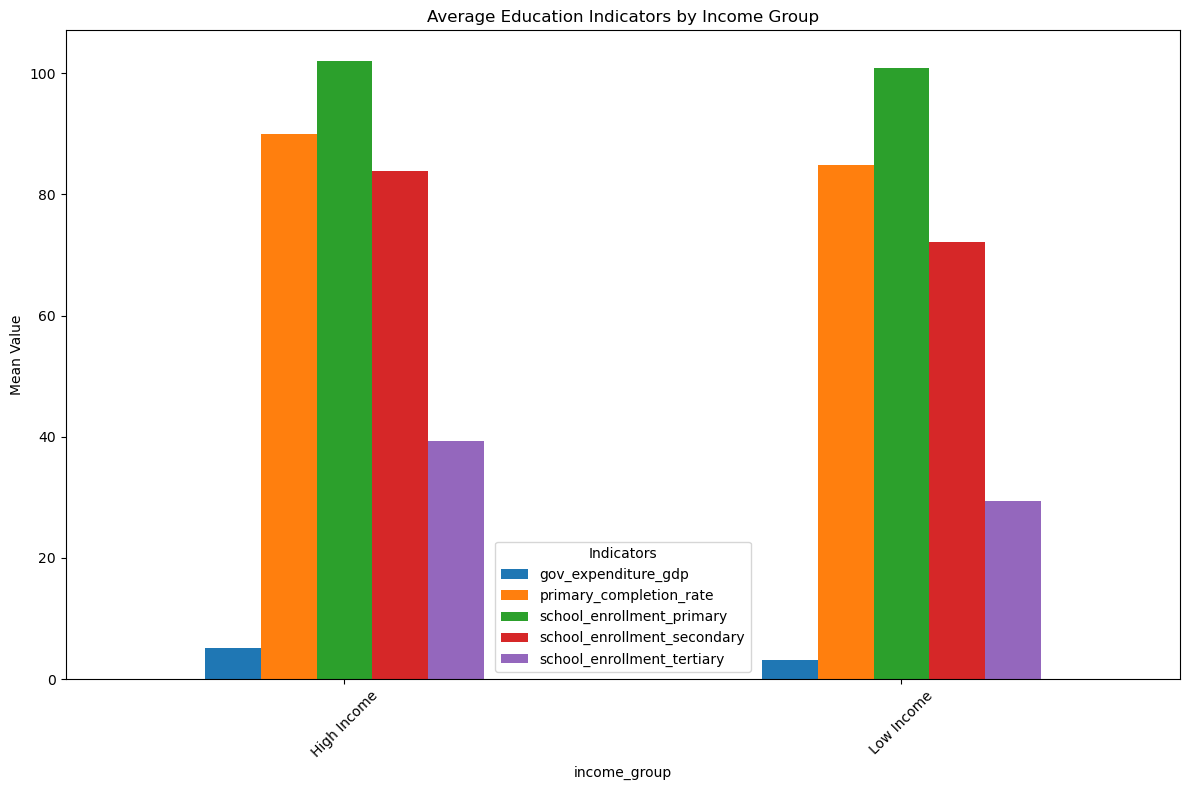

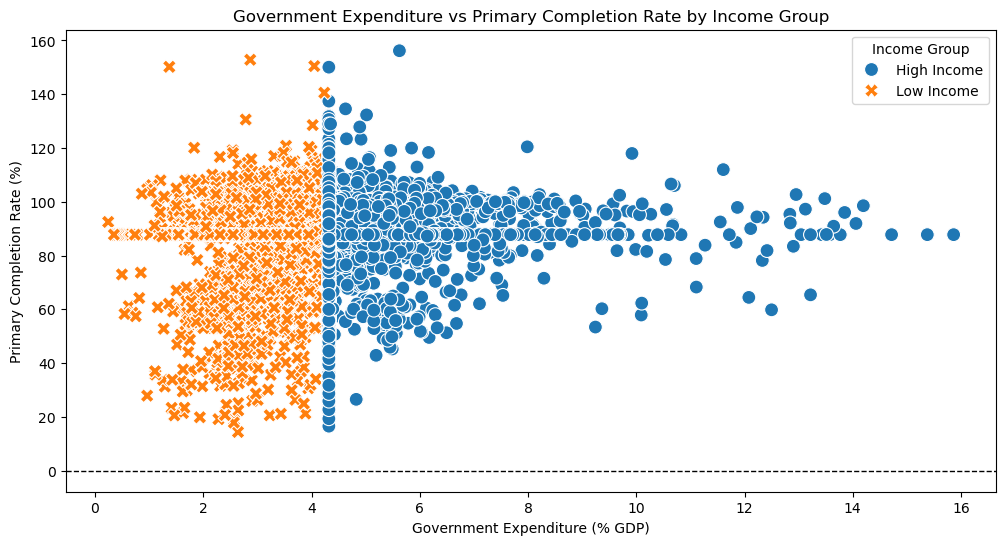

In [34]:
# The logic assumes that countries with a GDP below the median GDP are "Low Income" and those above are "High Income."

# Ensure no missing values in the relevant columns
data_cleaned = data.dropna(subset=[
    "gov_expenditure_gdp", "adult_literacy_rate",
    "primary_completion_rate", "school_enrollment_primary",
    "school_enrollment_secondary", "school_enrollment_tertiary"
])

# Create a new column to classify countries into Low Income and High Income based on gov_expenditure_gdp
# Threshold: median of gov_expenditure_gdp
gdp_threshold = data_cleaned["gov_expenditure_gdp"].median()
data_cleaned["income_group"] = data_cleaned["gov_expenditure_gdp"].apply(
    lambda x: "Low Income" if x < gdp_threshold else "High Income"
)

# Separate data into low-income and high-income groups
low_income = data_cleaned[data_cleaned["income_group"] == "Low Income"]
high_income = data_cleaned[data_cleaned["income_group"] == "High Income"]

# 1. Groupwise Summary Statistics
low_stats = low_income.describe().loc[["mean", "std", "50%"]]  # Statistics for low-income
high_stats = high_income.describe().loc[["mean", "std", "50%"]]  # Statistics for high-income

# Display results
print("Low Income Country Statistics:\n", low_stats)
print("High Income Country Statistics:\n", high_stats)

# 2. Statistical Test
# Perform t-tests for each education indicator
indicators = [
    "gov_expenditure_gdp", "adult_literacy_rate", "primary_completion_rate",
    "school_enrollment_primary", "school_enrollment_secondary", "school_enrollment_tertiary"
]
ttest_results = {
    indicator: ttest_ind(low_income[indicator], high_income[indicator], nan_policy="omit")
    for indicator in indicators
}

# Display t-test results
for indicator, result in ttest_results.items():
    print(f"T-test for {indicator}: p-value = {result.pvalue:.5f}")

# 3. Visualizations

# Visualization 1: Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned, x="income_group", y="primary_completion_rate")
plt.title("Primary Completion Rate: Low vs High Income")
plt.ylabel("Primary Completion Rate (%)")
plt.xlabel("Income Group")
plt.show()

# Visualization 2: Bar Plot
group_means = data_cleaned.groupby("income_group")[
    ["gov_expenditure_gdp", "primary_completion_rate", "school_enrollment_primary",
     "school_enrollment_secondary", "school_enrollment_tertiary"]
].mean()

group_means.plot(kind='bar', figsize=(12, 8))
plt.title("Average Education Indicators by Income Group")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(title="Indicators")
plt.tight_layout()
plt.show()

# Visualization 3: Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data_cleaned, x="gov_expenditure_gdp", y="primary_completion_rate",
    hue="income_group", style="income_group", s=100
)
plt.title("Government Expenditure vs Primary Completion Rate by Income Group")
plt.xlabel("Government Expenditure (% GDP)")
plt.ylabel("Primary Completion Rate (%)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(title="Income Group")
plt.show()


#Income Group Classification:

#The median GDP of the dataset is used as a threshold to divide countries into "Low Income" and "High Income" groups.
#Countries below the median are classified as "Low Income," and those above as "High Income."

#Summary Statistics:
#Descriptive statistics (mean, standard deviation, median) are computed for both groups.

#Statistical Tests:
#T-tests compare the means of each education indicator between low- and high-income groups.

#Visualizations:
    #Boxplot: Compares the distribution of primary completion rates.
    #Bar Plot: Displays the mean values of various indicators by income group.
    #Scatter Plot: Examines the relationship between government expenditure and primary completion rate, colored by income group.

#### Statistical Summary:

##### Low-Income Countries:
**Government Expenditure on Education (% GDP):** Mean is 3.15%, indicating a relatively lower allocation compared to high-income countries.
Adult Literacy Rate: Mean of 78.24%, suggesting significant room for improvement.
Primary Completion Rate: Mean of 84.86%, with substantial variation (std = 17.42).
**School Enrollment (Secondary and Tertiary):** Lower mean values (72.15% for secondary and 29.43% for tertiary), highlighting gaps in higher-level education access.

##### High-Income Countries:
**Government Expenditure on Education (% GDP):** Mean is 5.16%, significantly higher than low-income countries.

**Adult Literacy Rate:** Mean of 80.38%, slightly better but still showing a modest difference.

**Primary Completion Rate:** Higher mean of 89.88%, indicating better primary education completion rates.

**School Enrollment (Secondary and Tertiary):** Higher mean values (83.85% for secondary and 39.23% for tertiary), reflecting better access to higher-level education.

#### T-Test Results:
**Government Expenditure on Education:** Statistically significant difference (p-value < 0.00001), indicating a notable disparity in funding.

**Adult Literacy Rate and Primary Completion Rate:** Both show significant differences (p-value < 0.00001), suggesting that income levels strongly influence these indicators.

**School Enrollment:** Significant differences in primary, secondary, and tertiary enrollment rates, highlighting inequities in education access and attainment across income groups.

#### Visualizations:

##### Boxplot:
Primary completion rates are generally higher in high-income countries, with less variation.
Low-income countries show a broader range of values, with some significantly lower outliers.

##### Bar Chart:
Clear differences in average education indicators, with high-income countries outperforming low-income countries across all metrics.
The gap is particularly pronounced in secondary and tertiary enrollment rates.

##### Scatter Plot:
High-income countries exhibit higher primary completion rates at similar or higher government expenditure levels.
Low-income countries cluster at lower expenditure levels with wider variations in completion rates.

### Summary of Key Findings and Conclusion

#### Global Trends in Education:
The dataset reveals steady improvements in literacy rates and school enrollment globally, with disparities in government expenditure and pupil-teacher ratios across regions.
High-income countries typically have lower pupil-teacher ratios and higher school enrollment rates, while low-income countries face challenges in infrastructure and resource allocation.

#### Comparison of Two Countries:
Contrasting two selected countries highlights stark differences in educational outcomes and spending. High-income countries generally demonstrate higher literacy rates, primary completion rates, and tertiary enrollment compared to low-income counterparts, underscoring the impact of economic status on education systems.

#### Impact of Spending and Policies:
Statistical analyses indicate a significant correlation between government expenditure and improved literacy, enrollment, and overall outcomes. Pupil-teacher ratios also play a critical role, with smaller ratios correlating positively with better educational performance.

#### Effects of COVID-19:
The pandemic had uneven impacts globally, with some countries showing sharper declines in completion and enrollment rates. High-income countries demonstrated resilience, while low-income countries experienced more severe setbacks due to limited resources and infrastructure.

#### Differences Between Low- and High-Income Countries:
Education indicators such as tertiary enrollment and government spending differ significantly between income groups, with high-income countries outperforming low-income ones across all metrics. The disparity highlights the need for targeted policies and investments in low-income regions.

#### Conclusion
The analysis emphasizes the critical role of government expenditure and educational policies in driving better outcomes globally. The stark contrasts between income groups and the uneven impact of COVID-19 highlight the importance of equitable resource allocation and targeted interventions. Investing in infrastructure, reducing pupil-teacher ratios, and addressing the disparities between regions are crucial steps toward achieving global educational equity and resilience against future disruptions.
